### Обучение нейронной сети

На практике обучение нейронных сетей (подбор значений весов) производится при помощи **метода градиентного спуска**.

Обучение заключается в **минимизации функции потерь по обучаемым параметрам нейронной сети** — весам и смещениям.

Для минимизации функции потерь методом градиентного спуска **необходимо уметь вычислять градиент функции потерь по всем обучаемым параметрам модели**.

####  Прямое и обратное распространение

Процесс расчета градиента функции потерь по обучаемым параметрам состоит из двух этапов: **прямого и обратного распространения**.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/forward_pass.png" width="500"></center>

Во время **прямого распространения** (forward pass) производится расчет значений на выходе модели $y_{pred}$, которые передаются в функцию потерь $\text{Loss}$ для сравнения с целевыми значениями $y_{true}$.

$$\large y_{pred}=\text{model}\left(x, 𝐖\right)$$

$$\large L=\text{Loss}\left(y_{true}, y_{pred}\right)$$

Значение функции потерь зависит от целевых значений $y_{true}$, входных данных $x$ и параметров модели $𝐖$.

$$\large L=\text{Loss}\left(y_{true}, \text{model}\left(x, 𝐖\right)\right) = f\left(y_{true}, x, 𝐖\right)$$

А значит, если модель и функция потерь дифференцируемы, мы можем посчитать $\nabla_𝐖L$ — градиент функции потерь по обучаемым параметрам. Для этого нужен этап **обратного распространения** (backward pass).

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/backward_pass.png" width="500"></center>

####  Метод обратного распространения ошибки

[Learning Internal Representations by Error Propagation](https://stanford.edu/~jlmcc/papers/PDP/Volume%201/Chap8_PDP86.pdf)

Для эффективного численного расчета градиента функции потерь по обучаемым параметрам модели применяется **метод обратного распространения ошибки (backpropagation)**. Благодаря данному методу становится практически возможным использование метода градиентного спуска для проведения процедуры обучения.

Метод обратного распространения ошибки использует структуру многослойной нейронной сети как сложной функции, применяя **правило дифференцирования сложной функции** для вычисления градиента от функции потерь по весам сети. Градиент от функции потерь вычисляется при движении по нейронной сети от её выходов в направлении входов. Именно такой порядок обхода вычислительного графа и обуславливает название метода.

#### Вычислительный граф

По существу, нейронная сеть является сложной функцией, работу которой можно представить как последовательное выполнение математических операций. Такое представление функций называется **вычислительным графом**.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/nn_fully_connected.png" width="500"></center>

Алгоритм обратного распространения ошибки позволяет находить градиенты для любого графа вычислений, если описываемая им функция дифференцируема.

В его основе лежит правило взятия производной сложной функции (chain rule).

####  Пошаговый разбор метода обратного распространения

Пусть в каком-то узле графа производится вычисление

$$\large z = f(x, y),$$

и далее результат вычисления $\large z$ используется для вычисления функции $\large L(z)=L(f(x, y))$.

Тогда правило вычисления производных $\dfrac{\partial L}{\partial x}$ и $\dfrac{\partial L}{\partial y}$ можно представить следующим образом:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/rule_for_taking_gradients.png"  width="500"></center>

Рассмотрим следующую функцию:

$$\Large f(w,x)=\frac{1}{1+e^{-(w_0x_0+w_1x_1+w_2)}}$$

Представим ее в виде вычислительного графа, состоящего из элементарных операций, от которых просто берутся производные:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/graph_of_calculation_gradient.png"  width="700"></center>

На примере данной функции рассмотрим алгоритм обратного распространения ошибки и найдём величину её градиента по параметрам $\large w$.
Нам потребуется вычислить частные производные $\dfrac{\partial f}{\partial w_0}, \dfrac{\partial f}{\partial w_1}, \dfrac{\partial f}{dw_2}, \dfrac{\partial f}{\partial x_0}$ и $\dfrac{\partial f}{\partial x_1}$.

Пусть "веса" $w$ инициализированы значениями $w_0=2,\;w_1=-3,\;w_2=-3$, а "входные признаки" $x$ принимают значения $x_0=-1,\;x_1=-2$.

Делая прямой проход через граф вычислений для данной функции, получаем её значение для заданных $w$ и $x$ равным $f=0.73$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/forward_pass_example.png" width="800"></center>

Далее, в соответствии с алгоритмом обратного распространения ошибки, рассчитаем частные производные, пройдясь последовательно по графу вычислений, постепенно накапливая искомое значение для градиента функции.

Для начала зададим $\dfrac{df}{df}=1$.

Начинаем обратный проход по графу вычислений. Первая вершина содержит функцию $f(x)=\dfrac{1}{x}$, производная которой равна $\dfrac{df}{dx}=-\dfrac{1}{x^2}$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_1_step.png" width="800"></center>

$$\large f(x)=\frac1x \quad \longrightarrow \quad \frac{df}{dx} = -\frac{1}{x^2}$$

В следующем узле находится функция $f(x)=1+x$. Производная от выражения в данном узле равняется $\dfrac{df}{dx}=1$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_2_step.png" width="800"></center>

$$\large f(x)=c+x \quad \longrightarrow \quad \frac{df}{dx} = 1$$

Третья вершина содержит экспоненту $f(x)=e^x$. Её производная также является экспонентой $\dfrac{df}{dx}=e^x$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_3_step.png" width="800"></center>

$$\large f(x)=e^x \quad \longrightarrow \quad \frac{df}{dx} = e^x$$

Следующая вершина, четвертая, содержит умножение на константу $f(x)=ax$. Производная равна $\dfrac{df}{dx}=a$ (в данном случае $a=-1$):

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_4_step.png" width="800"></center>

$$\large f(x)=ax \quad \longrightarrow \quad \frac{df}{dx} = a$$

Двигаясь по графу вычислений, мы дошли до узла суммирования, который имеет два входа. Относительно каждого из входов локальный градиент в вершине суммирования будет равен $1$:
$$\large f(x,y)=x+y \quad \Rightarrow \quad \frac{\partial f}{\partial x}=1  \quad \quad \frac{\partial f}{\partial y}=1$$
Так как умножение на единицу не изменит значения входного градиента, всем входам узла суммирования мы можем приписать точно такое же значение входного градиента ($0.2$), что мы имели и для самого узла суммирования. Будем действовать аналогично и со всеми остальными узлами суммирования, которые встретятся нам в вычислительном графе.

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_5_step.png" width="800"></center>

Двигаясь далее к началу графа вычислений, мы подходим к вершинам умножения. Для такой вершины локальный градиент по отношению к какому-либо из входов будет равен значению оставшегося входа. Остается умножить локальный градиент на входящий.

$$\large f(w,x)=wx \quad \Rightarrow \quad \frac{\partial f}{\partial w}=x  \quad \quad \frac{\partial f}{\partial x}=w$$

Точно так же мы можем поступить и с оставшейся второй вершиной умножения, которая привязана к $w_1$ и $x_1$:

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_6_step.png" width="800"></center>

Так, двигаясь по графу вычислений в обратном направлении от выхода функции к входным аргументам, мы последовательно для каждого узла умножаем локальный градиент на входящий градиент, используя цепное правило дифференцирования сложной функции. В описанном примере мы полностью разбили граф вычислений на отдельные элементарные узлы. Разбиение вычислительного графа на элементарные узлы вовсе не обязательно — мы можем сгруппировать несколько вершин вместе, если они образуют дифференцируемую функцию, от которой "удобно" брать производную, и рассматривать их совместно.

В нашем примере мы можем заметить, что вычислительный граф можно свести к двум операциям: получению выражения $w_0x_0+w_1x_1+w_2$ и последующему вычислению от него сигмоидальной функции.

Функция сигмоиды:

$$\large \displaystyle \sigma(x) = \frac{1}{1+e^{-x}}.$$

Важно отметить, что сигмоида обладает важным свойством: её производная может быть выражена через саму сигмоидальную функцию:

$$\large \frac{d}{dx}\sigma(x) = \frac{d}{dx}(1+e^{-x})^{-1} = \frac{e^{-x}}{(1+e^{-x})^{2}} = \frac{1}{1+e^{-x}} \cdot \frac{1+e^{-x}-1}{1+e^{-x}} = \sigma(x)\cdot(1-\sigma(x))$$

<center><img src ="https://edunet.kea.su/repo/EduNet-content/dev-2.3/L05/out/compute_gradient_join_vertices_sigmoid_example.png" width="800"></center>

### PyTorch Autograd - automatic differentiation engine

[PyTorch 101, Part 1: Understanding Graphs, Automatic Differentiation and Autograd](https://blog.paperspace.com/pytorch-101-understanding-graphs-and-automatic-differentiation/)

В центре большинства современных приемов машинного обучения лежит расчет градиентов. Это в особенности касается нейронных сетей, где для обновления весовых коэффициентов используется алгоритм обратного распространения

Autograd предоставляет классы и функции, реализующие автоматическое дифференцирование произвольных скалярных функций. Это требует минимальных изменений в существующем коде - нужно только объявить Tensor, для которого должны вычисляться градиенты, с атрибутом `requires_grad=True`

In [69]:
import torch

In [70]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [71]:
x.grad == None

True

In [72]:
x.grad_fn == None

True

После применения какой-либо операции к тензору атрибуту `grad_fn`  присваивается объект `Function`, который добавляется в граф вычислений для обратного распространения градиента.



In [73]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [74]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


`.grad_fn` может менять "на лету"

In [75]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


Метод `backward` корневого узла графа вычислений запускает процедуру вычисления градиентов в листовых (is_leaf) узлах, имеющих атрибут requires_grad. Граф дифференцируется по цепочке (chain rule)

In [76]:
out.backward()

In [77]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


По умолчанию промежуточные (не листовые) узлы графа не хранят прошедшие через них градиентов.

In [78]:
print(y.grad)

None


<ipython-input-78-b81046718426>:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(y.grad)


Эту ситуацию можно изменить, вызвав для для конкретного узла метод retain_grad

In [79]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
y.retain_grad()
z = y * y * 3
out = z.mean()
out.backward()

In [80]:
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [81]:
print(y.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


Иногда с листовыми узлами необходимо проделать действия, не меняя при этом графа. Такие действия проводят, используя контекстный менедежр `no_grad`, которое блокирует создание новых узлов графа

In [82]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad(): # потом можно включить вручную torch.enable_grad()
    print((x ** 2).requires_grad)


True
True
False


### Micrograd

[micrograd](https://github.com/karpathy/micrograd)

In [83]:
!git clone https://github.com/karpathy/micrograd.git

Cloning into 'micrograd'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 98 (delta 39), reused 38 (delta 38), pack-reused 38 (from 1)
Receiving objects: 100% (98/98), 258.88 KiB | 3.86 MiB/s, done.
Resolving deltas: 100% (44/44), done.


In [84]:
%cd micrograd

/content/micrograd/micrograd/micrograd


In [85]:
import random
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from graphviz import Digraph

from micrograd.engine import Value
from micrograd.nn import Neuron, Layer, MLP, Module

from sklearn.datasets import make_moons, make_blobs

In [86]:
np.random.seed(42)
random.seed(42)

#### Пример построения графа вычислений

In [87]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})

    for n in nodes:
        dot.node(name=str(id(n)), label = "{ data %.4f | grad %.4f }" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)

    return dot

In [88]:
Value??

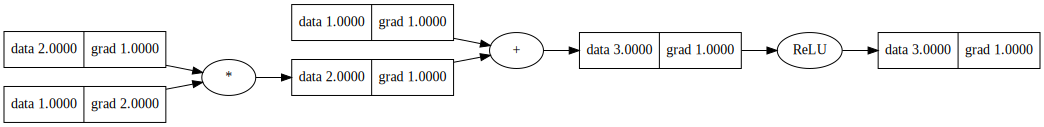

In [89]:
x = Value(1.0)
y = (x * 2 + 1).relu()
y.backward()
draw_dot(y)

In [90]:
Neuron??

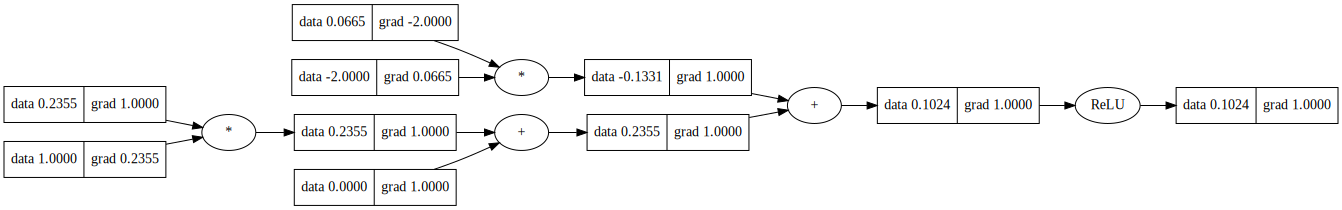

In [91]:
random.seed(1337)
n = Neuron(2)
x = [Value(1.0), Value(-2.0)]
y = n(x)
y.backward()

dot = draw_dot(y)
dot

#### MLP для бинарной классификации

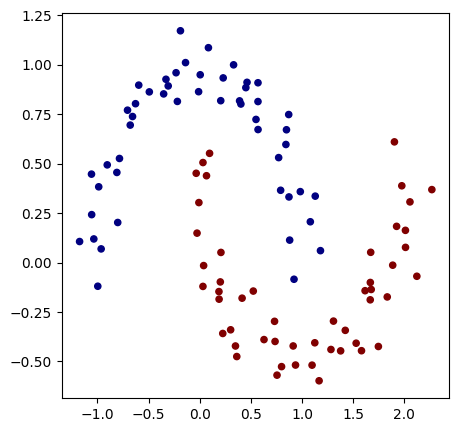

In [92]:
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [93]:
X[0], y[0]

(array([ 1.58202308, -0.44581483]), 1)

In [94]:
MLP??

In [95]:
Layer??

In [96]:
Module??

In [97]:
model = MLP(2, [16, 16, 1]) # 2-layer neural network
print("number of parameters", len(model.parameters()))

number of parameters 337


In [98]:
model.layers

[Layer of [ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2), ReLUNeuron(2)],
 Layer of [ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16), ReLUNeuron(16)],
 Layer of [LinearNeuron(16)]]

In [99]:
# посчитаем параметры
(2 * 16 + 16) + (16 * 16 + 16) + (16 * 1 + 1)

337

In [100]:
def loss(batch_size=None):
    Xb, yb = X, y
    inputs = [list(map(Value, xrow)) for xrow in Xb]

    # forward the model to get scores
    scores = list(map(model, inputs))

    # svm "max-margin" loss
    losses = [(1 + -yi * score_i).relu() for yi, score_i in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p * p for p in model.parameters()))
    total_loss = data_loss + reg_loss

    # also get accuracy
    accuracy = [(yi > 0) == (score_i.data > 0) for yi, score_i in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Value(data=0.41454652413193865, grad=0) 0.82


In [101]:
for k in range(100):
    # forward
    total_loss, acc = loss()

    # backward
    model.zero_grad()
    total_loss.backward()

    # update (sgd)
    learning_rate = 1.0 - 0.9 * k / 100
    for p in model.parameters():
        p.data -= learning_rate * p.grad

    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.41454652413193865, accuracy 82.0%
step 1 loss 0.786380504621518, accuracy 81.0%
step 2 loss 0.461961145267714, accuracy 83.0%
step 3 loss 0.5085892319645842, accuracy 83.0%
step 4 loss 0.3104905268726122, accuracy 86.0%
step 5 loss 0.2689947571730255, accuracy 89.0%
step 6 loss 0.24554659072506868, accuracy 89.0%
step 7 loss 0.23622330038400668, accuracy 90.0%
step 8 loss 0.2172094670331255, accuracy 90.0%
step 9 loss 0.21400559443772385, accuracy 91.0%
step 10 loss 0.209392600578948, accuracy 91.0%
step 11 loss 0.33002109168075433, accuracy 92.0%
step 12 loss 0.38174928707618505, accuracy 87.0%
step 13 loss 0.4508064668364713, accuracy 85.0%
step 14 loss 0.24799516110878045, accuracy 89.0%
step 15 loss 0.1930286384893896, accuracy 91.0%
step 16 loss 0.18158693713880053, accuracy 93.0%
step 17 loss 0.1837186678930047, accuracy 94.0%
step 18 loss 0.17646529149266213, accuracy 92.0%
step 19 loss 0.21186442386108978, accuracy 95.0%
step 20 loss 0.23740708747640155, accuracy 

(-1.5978882018302847, 2.1521117981697153)

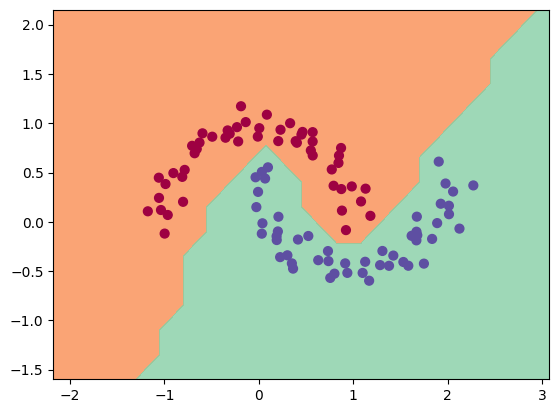

In [102]:
h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Value, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())